# Exploratory Data Analysis

## Librerias

In [2]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
import re


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

## Leer Datos

In [3]:
df = pd.read_excel('../datasets/df.xlsx')
# df = pd.read_excel('dataset_2023.xlsx')
# df["Descripcion"] = df["Descripcion"].fillna("")
df.shape

(46367, 18)

In [5]:
df.head()

Tipo comp.       NÂ° cuenta  \
0         AF  360000003873122   
1         AF         71111333   
2         AF         71111333   
3         AF  360000003873122   
4         AF  360000003873122   

                                        Desc. Cuenta  NÂ° TesorerÃ­a  \
0  SGP-RENTAS GRALES-PAGADORA                    ...               1   
1  SGP - CTA PAGADORA- CHEQUES DIFERIDOS         ...               1   
2  SGP - CTA PAGADORA- CHEQUES DIFERIDOS         ...               1   
3  SGP-RENTAS GRALES-PAGADORA                    ...               1   
4  SGP-RENTAS GRALES-PAGADORA                    ...               1   

                    Desc. TesorerÃ­a  NÂ° Entidad  \
0  TESORERIA GENERAL DE LA PROVINCIA           50   
1  TESORERIA GENERAL DE LA PROVINCIA           50   
2  TESORERIA GENERAL DE LA PROVINCIA           50   
3  TESORERIA GENERAL DE LA PROVINCIA           50   
4  TESORERIA GENERAL DE LA PROVINCIA           50   

                         Desc. Entidad Tipo Pres. Tipo Reg. Clase Reg.  Cod.  \
0  SAF OBLIGACIONES A CARGO DEL TESORO          E       ANT              229   
1  SAF OBLIGACIONES A CARGO DEL TESORO          E       ANT              229   
2  SAF OBLIGACIONES A CARGO DEL TESORO          E       ANT              229   
3  SAF OBLIGACIONES A CARGO DEL TESORO          E       ANT              225   
4  SAF OBLIGACIONES A CARGO DEL TESORO          E       ANT              225   

   Fte. Fin.         Cuit                                       Beneficiario  \
0         10  30517999551  CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...   
1         10  30517999551  CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...   
2         10  30517999551  CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...   
3         10  30709059951                          CPA FDO- FID- MUNI- LULES   
4         10  33709060029                     CPA FDO- FID- MUNI- CONCEPCION   

                                         Descripcion Tipo cta  Cod. Bco.  \
0  AFR-PLAN DE OBRAS- EQUIPAMIENTOS Y SERVICIOS 2022        R          7   
1        D-312-ME-22-FONDOS P-EROGACIONES PLAN OBRAS        P          7   
2  AFR-PLAN DE OBRAS-EQUIPAMIENTO Y SERVICIOS 202...        P          7   
3  DCTO N-119-SH-22-AFR-PGO HAB-ASIG-FLIAR ENE-22...        R          7   
4  DCTO N-120-SH-22-AFR-PGO HAB-ASIG-FLIAR ENE-22...        R          7   

     Class  
0      ANR  
1      PTE  
2      PTE  
3  Sueldos  
4  Sueldos

In [6]:
df.sample(5)

Tipo comp.       NÂ° cuenta  \
39546         GE  360000003873122   
5741          GC  360000003873122   
17860         GC  360000003873122   
24477         GC  360000003873122   
35166         GE  360000003873122   

                                            Desc. Cuenta  NÂ° TesorerÃ­a  \
39546  SGP-RENTAS GRALES-PAGADORA                    ...               1   
5741   SGP-RENTAS GRALES-PAGADORA                    ...               1   
17860  SGP-RENTAS GRALES-PAGADORA                    ...               1   
24477  SGP-RENTAS GRALES-PAGADORA                    ...               1   
35166  SGP-RENTAS GRALES-PAGADORA                    ...               1   

                        Desc. TesorerÃ­a  NÂ° Entidad  \
39546  TESORERIA GENERAL DE LA PROVINCIA           12   
5741   TESORERIA GENERAL DE LA PROVINCIA           22   
17860  TESORERIA GENERAL DE LA PROVINCIA           12   
24477  TESORERIA GENERAL DE LA PROVINCIA            7   
35166  TESORERIA GENERAL DE LA PROVINCIA           36   

                                       Desc. Entidad Tipo Pres. Tipo Reg.  \
39546   SAF MI DIRECCION DE ADM- MINIST- DE INTERIOR          E       PAG   
5741   SAF MOSP DPTO S-ADM-FIN-DIR- ARQ- Y URBANISMO          P       ORD   
17860   SAF MI DIRECCION DE ADM- MINIST- DE INTERIOR          P       ORD   
24477  SAF GSGG DIR-A Y D SEC-E-COMUNICACION PUBLICA          P       ORD   
35166  SAF MED SEC E- GEST A-MINISTERIO DE EDUCACION          E       PAG   

      Clase Reg.  Cod.  Fte. Fin.         Cuit  \
39546              391         10          323   
5741         OGA     0         10  20397298508   
17860        OGA     0         10  33715109099   
24477        OGA     0         10  27244329263   
35166              392         10          329   

                                            Beneficiario  \
39546  SECRET-DE ESTADO DE COORDINACION CON MUNICIPIO...   
5741                             RODRIGUEZ LUCAS GABRIEL   
17860                                  TODOLANDIA S-R-L-   
24477                               GEREZ NATALIA VANESA   
35166                            MINISTERIO DE EDUCACION   

                                             Descripcion Tipo cta  Cod. Bco.  \
39546  RES- 528-10 CTA- 97426-2 ADIC- LEY 9499 2- SAC...        R          7   
5741   A85-F-1-6-CTA-362809420596249-01-01 A 01-02-R-...        R          7   
17860  N-96 N-FACT01129264 N-CTA3600003818039 ART LIB...        R          7   
24477  R-N- 3288-1 - GEREZ - F-N- 14 - C-N- 360094203303        R          7   
35166  AY SOC D-N-4271-5 MED DOC Y P AUX EST G PRV C3...        R          7   

                    Class  
39546             Sueldos  
5741                   PV  
17860                  PV  
24477              Prensa  
35166  Transferencias rep

In [7]:
df.tail(5)

Tipo comp.       NÂ° cuenta  \
46362         GE  360000003873122   
46363         GE  360000003873122   
46364         GE  360000003873122   
46365         GE  360000003873122   
46366         GE  360000003873122   

                                            Desc. Cuenta  NÂ° TesorerÃ­a  \
46362  SGP-RENTAS GRALES-PAGADORA                    ...               1   
46363  SGP-RENTAS GRALES-PAGADORA                    ...               1   
46364  SGP-RENTAS GRALES-PAGADORA                    ...               1   
46365  SGP-RENTAS GRALES-PAGADORA                    ...               1   
46366  SGP-RENTAS GRALES-PAGADORA                    ...               1   

                        Desc. TesorerÃ­a  NÂ° Entidad  \
46362  TESORERIA GENERAL DE LA PROVINCIA           19   
46363  TESORERIA GENERAL DE LA PROVINCIA           19   
46364  TESORERIA GENERAL DE LA PROVINCIA           18   
46365  TESORERIA GENERAL DE LA PROVINCIA            6   
46366  TESORERIA GENERAL DE LA PROVINCIA           36   

                                       Desc. Entidad Tipo Pres. Tipo Reg.  \
46362  SAF ME DEP SERV- ADM- FIN-DIR-GRAL- DE RENTAS          E       PAG   
46363  SAF ME DEP SERV- ADM- FIN-DIR-GRAL- DE RENTAS          E       PAG   
46364        SAF ME DIR- ADM- MINISTERIO DE ECONOMIA          E       PAG   
46365  SAF GSGG DIR-ADM Y D- REP-OFIC DE PROV CA- F-          E       PAG   
46366  SAF MED SEC E- GEST A-MINISTERIO DE EDUCACION          E       PAG   

      Clase Reg.  Cod.  Fte. Fin.  Cuit  \
46362              391         10   490   
46363              391         10   490   
46364              391         10   530   
46365              391         10    80   
46366              391         10   329   

                                            Beneficiario  \
46362                       DIRECCION GENERAL  DE RENTAS   
46363                       DIRECCION GENERAL  DE RENTAS   
46364                      DIRECCION GENERAL DE CATASTRO   
46365  REPRESENTACION OFICIAL DE LA PROVINCIA EN CAPI...   
46366                            MINISTERIO DE EDUCACION   

                                             Descripcion Tipo cta  Cod. Bco.  \
46362  LEY RI 2100-23 CTA 360000200973511 LEY 7991 CA...        R          7   
46363  LEY RI 2099-23 CTA 360000200973511 LEY 7991 DG...        R          7   
46364  R-3887-DGC-23-LEY 7991 NOV 2023 - CTA 36000020...        R          7   
46365       RES-359-RO-LEY7991-HABERES DIC-3  CTA 789009        R          7   
46366        LEY 7991 HAB DIC-23 R173 C- 360000200983222        R          7   

         Class  
46362  Sueldos  
46363  Sueldos  
46364  Sueldos  
46365  Sueldos  
46366  Sueldos

In [27]:
df.isna().sum()

Tipo comp.          0
NÂ° cuenta          0
Desc. Cuenta        0
NÂ° TesorerÃ­a      0
Desc. TesorerÃ­a    0
NÂ° Entidad         0
Desc. Entidad       0
Tipo Pres.          0
Tipo Reg.           0
Clase Reg.          0
Cod.                0
Fte. Fin.           0
Cuit                0
Beneficiario        0
Descripcion         1
Tipo cta            0
Cod. Bco.           0
Class               0
dtype: int64

In [4]:
df["Descripcion"] = df["Descripcion"].fillna("")

In [5]:
def limpiar_texto(texto):
    texto = texto.upper()
    texto = re.findall(r"[A-Z0-9]{3,}", texto)
    texto = " ".join(texto).strip()
    return texto

df["Descripcion"] = df["Descripcion"].apply(limpiar_texto)

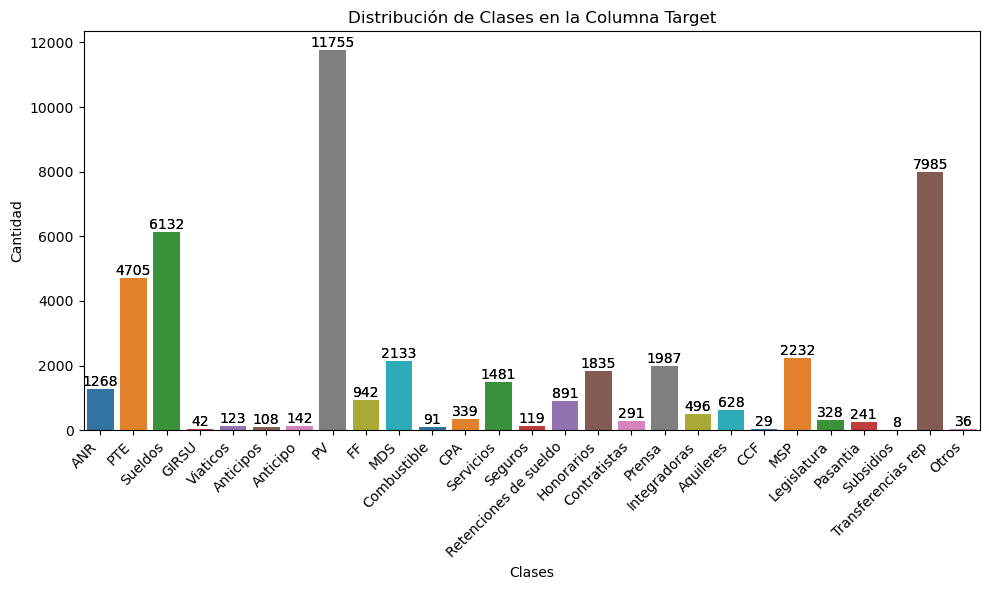

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df)
# Add color for each category
colors = sns.color_palette("tab10")
ax = sns.countplot(x='Class', data=df, palette=colors)

plt.title('Distribución de Clases en la Columna Target')
plt.xlabel('Clases')
plt.ylabel('Cantidad')

# Añadir etiquetas de cantidad sobre cada barra
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### WordCloud

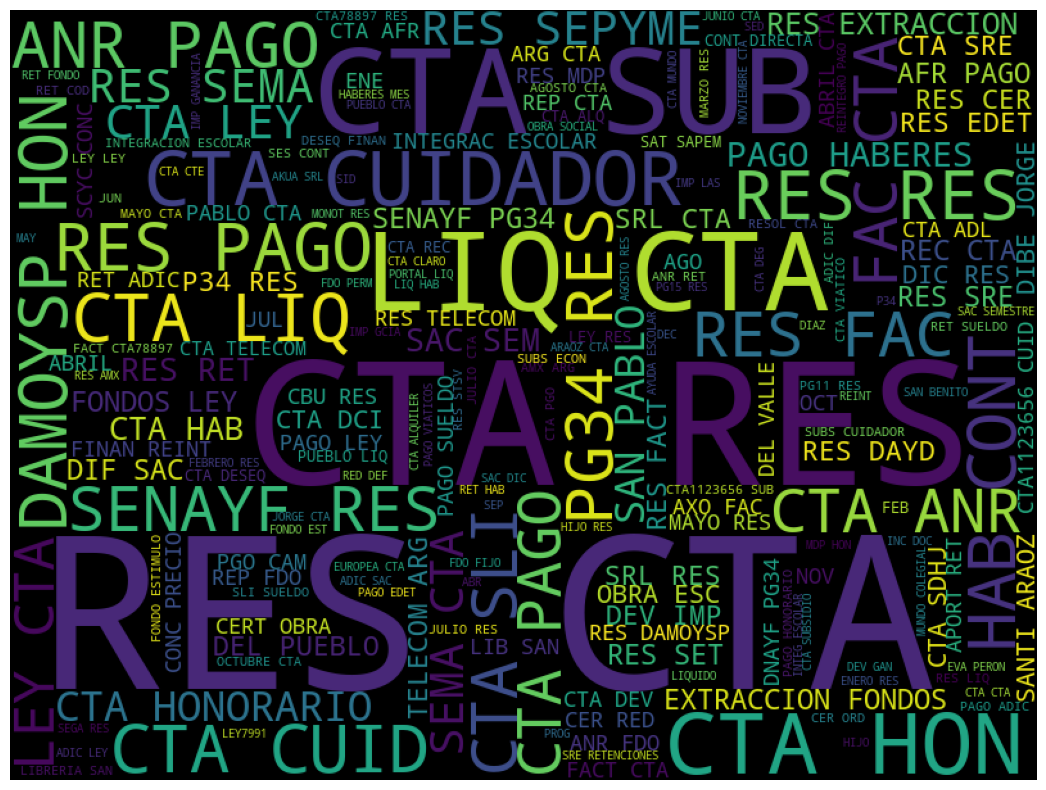

In [21]:
wc = WordCloud(' '.join(df['Descripcion']))
def cloud(data, backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['Descripcion']))

#### Longitud de descripciones

In [6]:
df['text_size'] = df['Descripcion'].str.len()
df['text_size'].describe()

count    46367.000000
mean        41.789980
std          8.437751
min          0.000000
25%         36.000000
50%         43.000000
75%         48.000000
max         60.000000
Name: text_size, dtype: float64

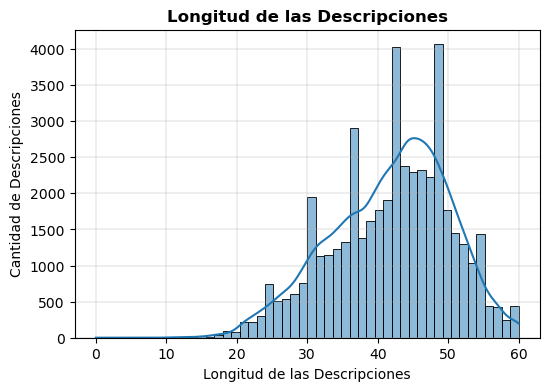

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df['text_size'], kde=True, bins=50)
plt.title('Longitud de las Descripciones', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Longitud de las Descripciones')
plt.grid(linewidth=0.3)
plt.show()

In [7]:
df['text_words_count'] = df['Descripcion'].apply(lambda x: len(x.split()))  
df['text_words_count'].describe()

count    46367.000000
mean         6.576682
std          1.457556
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         14.000000
Name: text_words_count, dtype: float64

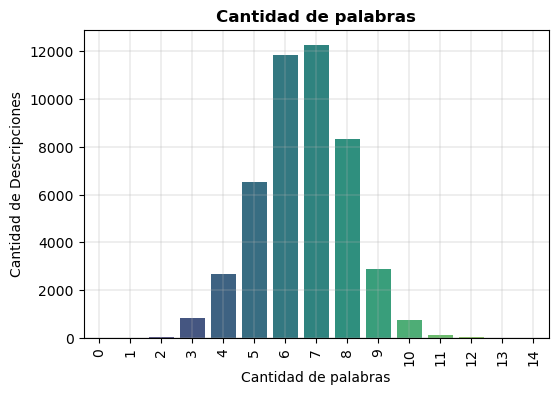

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['text_words_count'].value_counts().index, y=df['text_words_count'].value_counts().values, palette='viridis')
plt.title('Cantidad de palabras', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Cantidad de palabras')
plt.grid(linewidth=0.3)
plt.xticks(rotation=90)  # Rotar las etiquetas si hay muchas categorías
plt.show()


#### Frecuencia de palabras

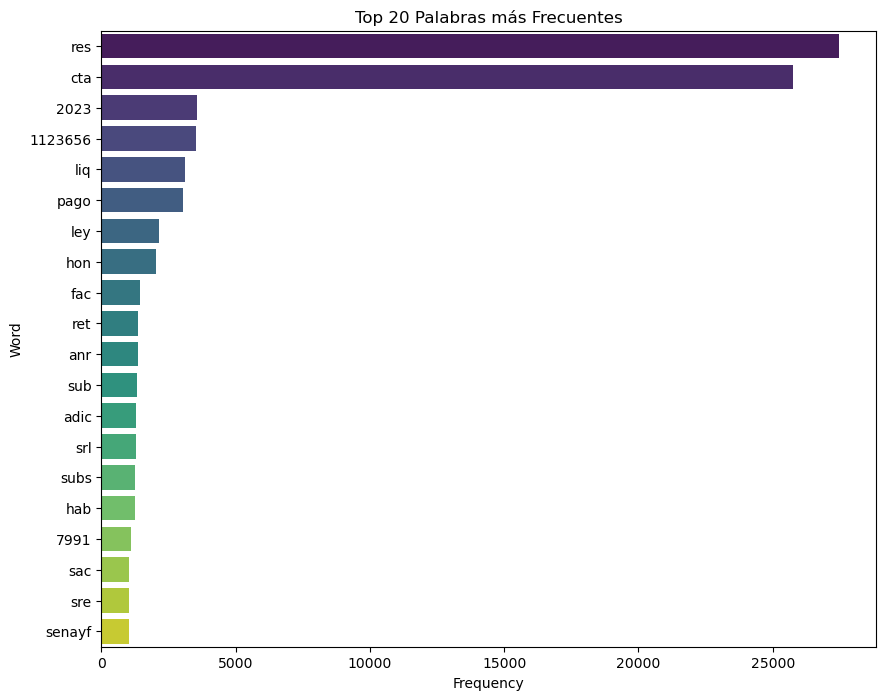

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Obtener todas las descripciones como una lista de palabras
all_descriptions = ' '.join(df['Descripcion'].dropna())  # Concatenar todas las descripciones

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('spanish')) 
word_tokens = word_tokenize(all_descriptions.lower())  # Tokenización y convertir a minúsculas
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]  # Filtrar stopwords y no palabras alfa
freq_of_words = pd.Series(filtered_words).value_counts()



# Crear DataFrame con las palabras y sus frecuencias
freq_of_words = pd.Series(filtered_words).value_counts().reset_index()
freq_of_words.columns = ['Word', 'Frequency']

# Seleccionar las 20 palabras más frecuentes
top_words = freq_of_words.head(20)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras horizontal
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Palabras más Frecuentes')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

#### Frecuencia de palabras según target

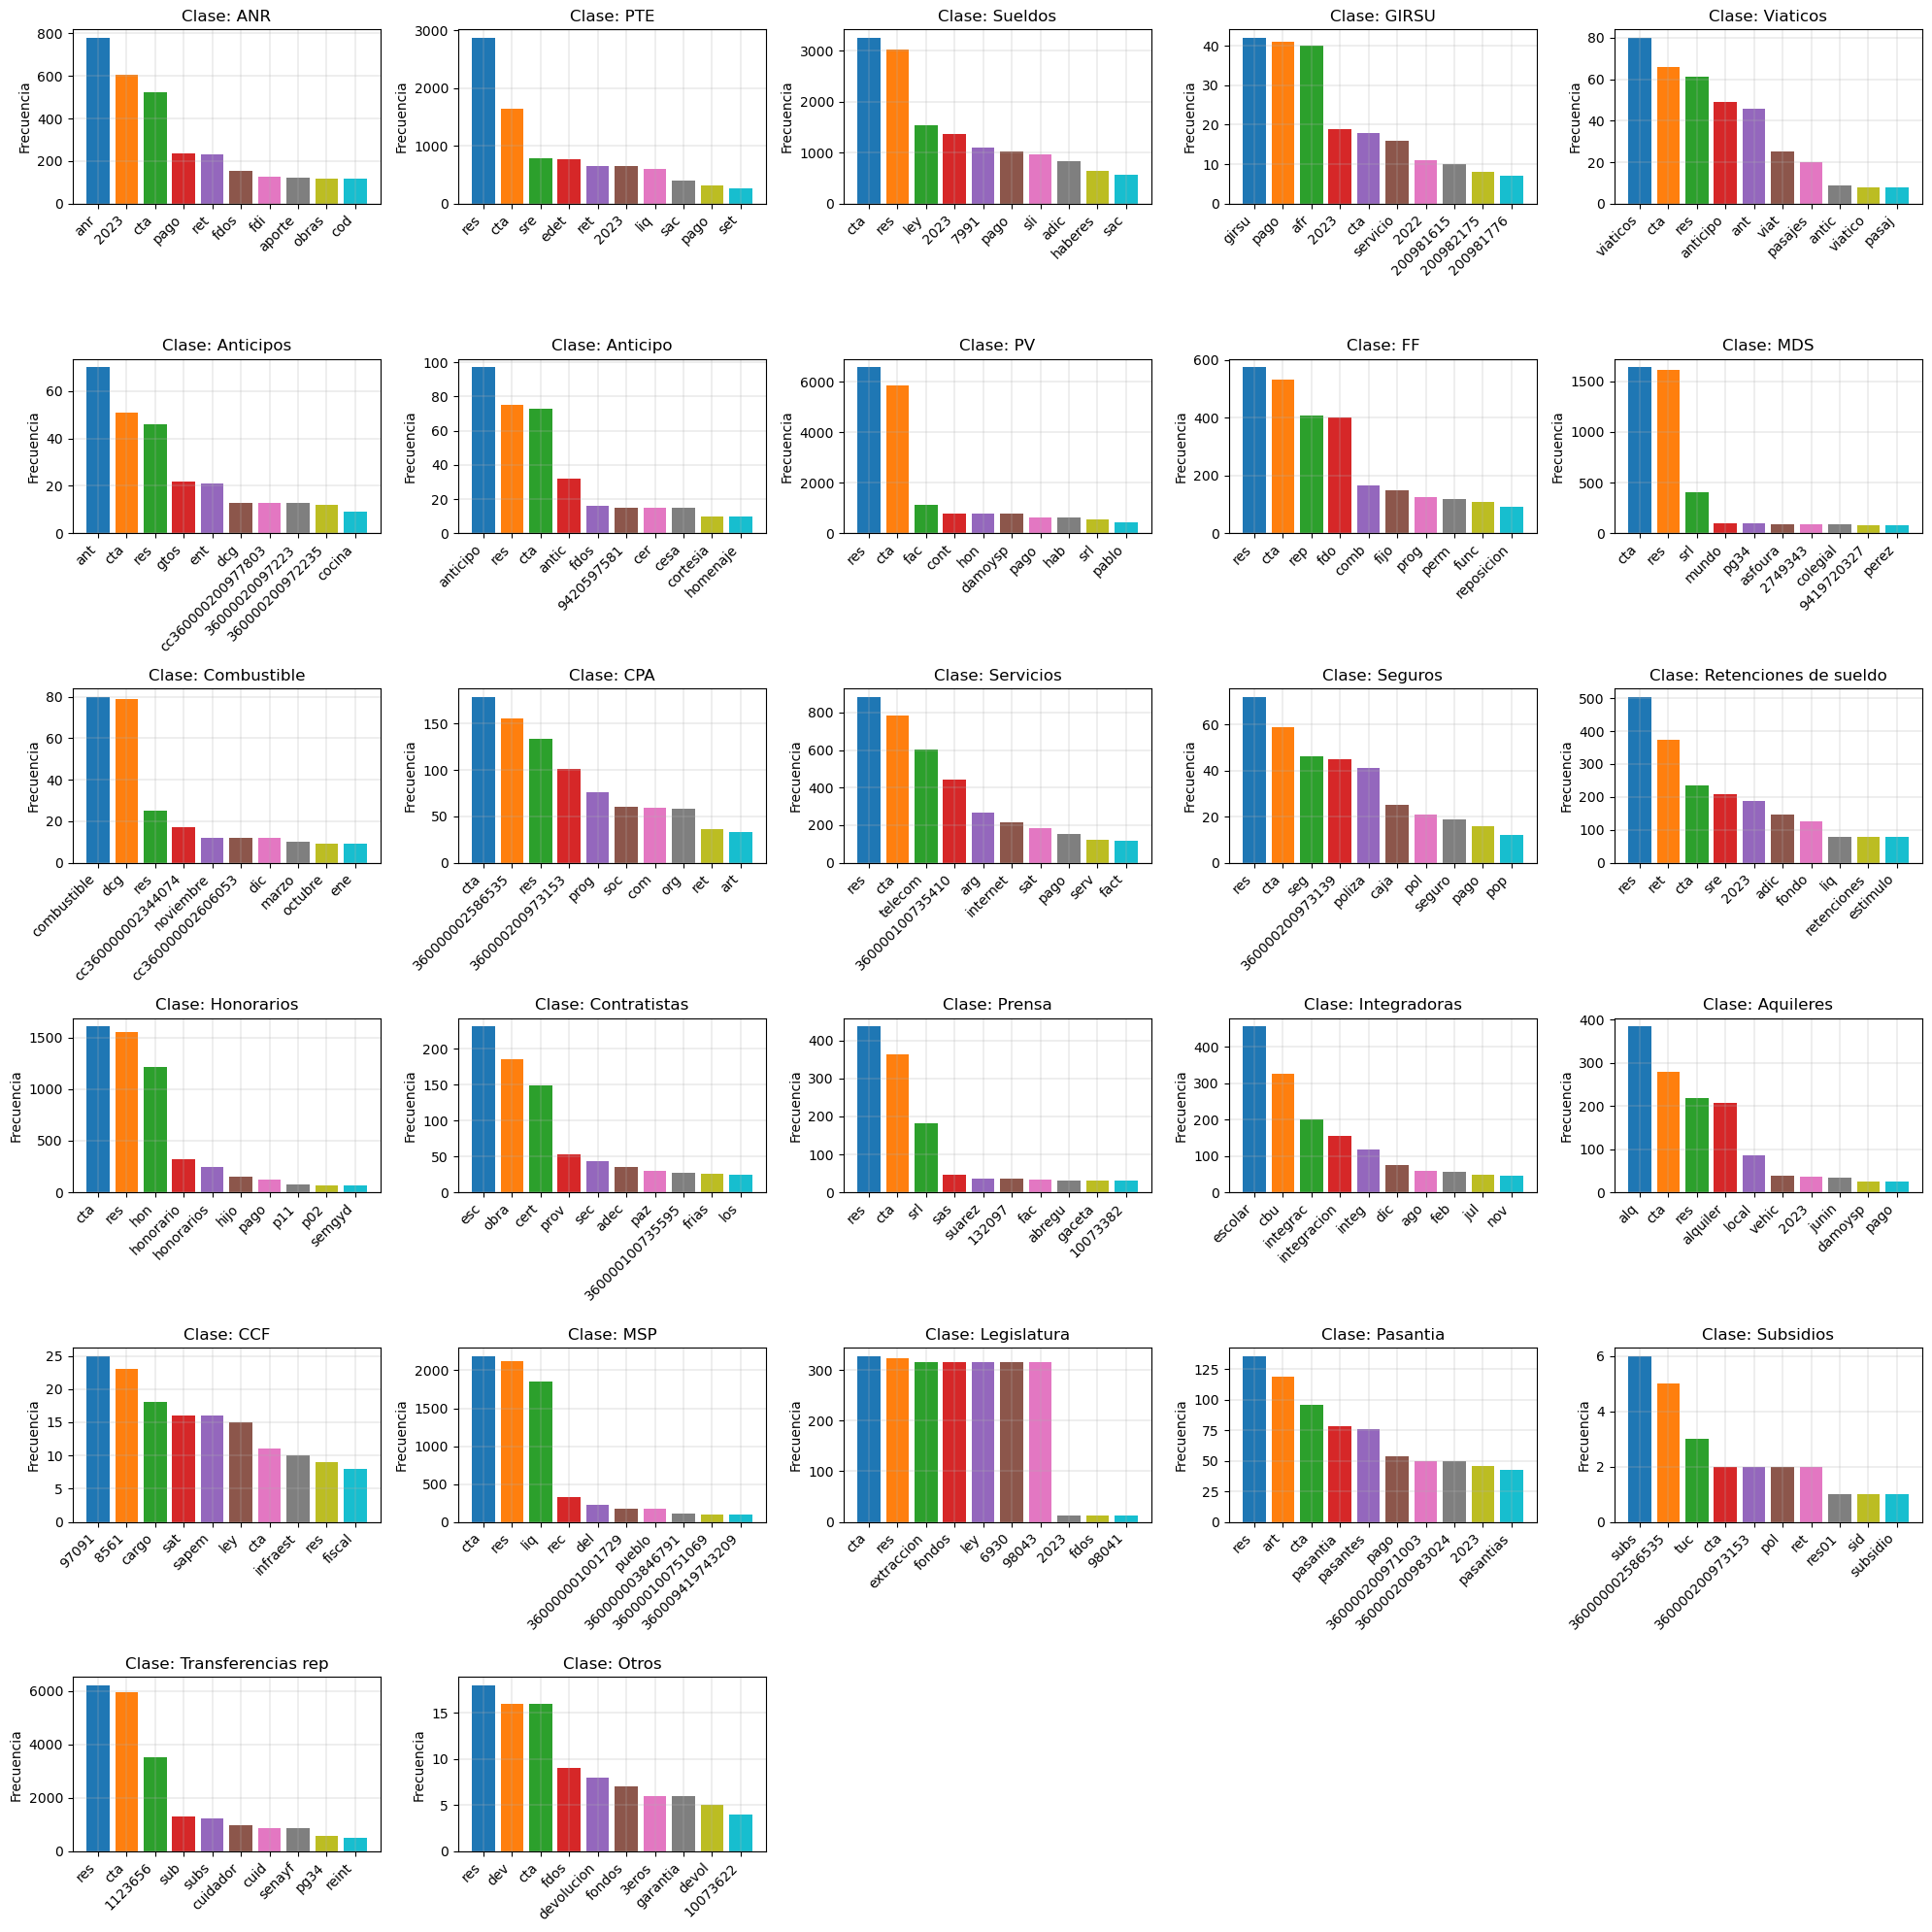

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Configurar el layout de la grilla, ajustando a solo 27 subplots (5 filas x 5 columnas)
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes = axes.flatten()  # Convertir la grilla en una lista
colors = sns.color_palette("tab10")

# Iterar sobre cada clase en "Class"
for i, class_value in enumerate(df['Class'].unique()):
    if i >= 27:  # Evitar subplots adicionales si hay más de 27 clases
        break
    
    # Combinar el texto para la clase actual
    combined_text = ' '.join(df[df['Class'] == class_value]['Descripcion'].astype(str))
    
    # Tokenizar el texto en palabras
    tokens = word_tokenize(combined_text.lower())  # Convertir a minúsculas
    
    # Crear la distribución de frecuencias
    fdist = FreqDist(tokens)
    
    # Tomar las 10 palabras más comunes
    most_common_words = fdist.most_common(10)
    
    # Separar las palabras y sus frecuencias para graficar
    words, counts = zip(*most_common_words)
    
    # Graficar en la posición correspondiente de la grilla
    ax = axes[i]
    ax.bar(words, counts, color=colors)
    ax.set_title(f"Clase: {class_value}", fontsize=12)
    ax.set_xticklabels(words, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Frecuencia')
    ax.grid(linewidth=0.3)

# Eliminar los subplots vacíos (28, 29 y 30)
for j in range(27, 30):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


#### Word2Vect: Distacia entre palabras más frecuentes

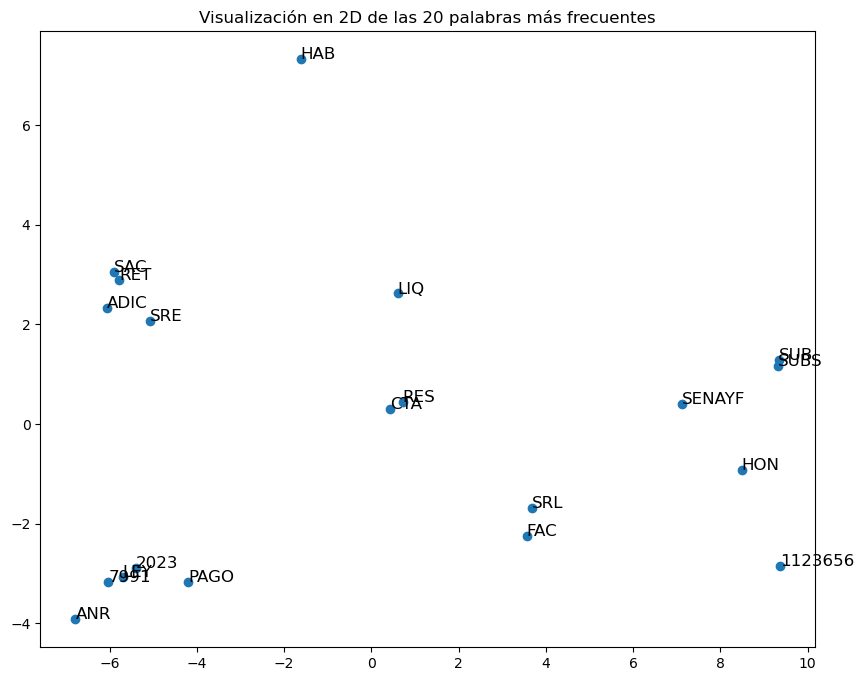

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar las oraciones como listas de palabras
sentences = [row.split() for row in df['Descripcion']]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Obtener los vectores de las palabras
words = list(model.wv.index_to_key)

# Seleccionar las 20 palabras más frecuentes
top_words = words[:20]
X = model.wv[top_words]

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Anotar solo las palabras seleccionadas en el gráfico
for i, word in enumerate(top_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title('Visualización en 2D de las 20 palabras más frecuentes')
plt.show()


#### Word2Vect: Distacia entre palabras más frecuentes por clase

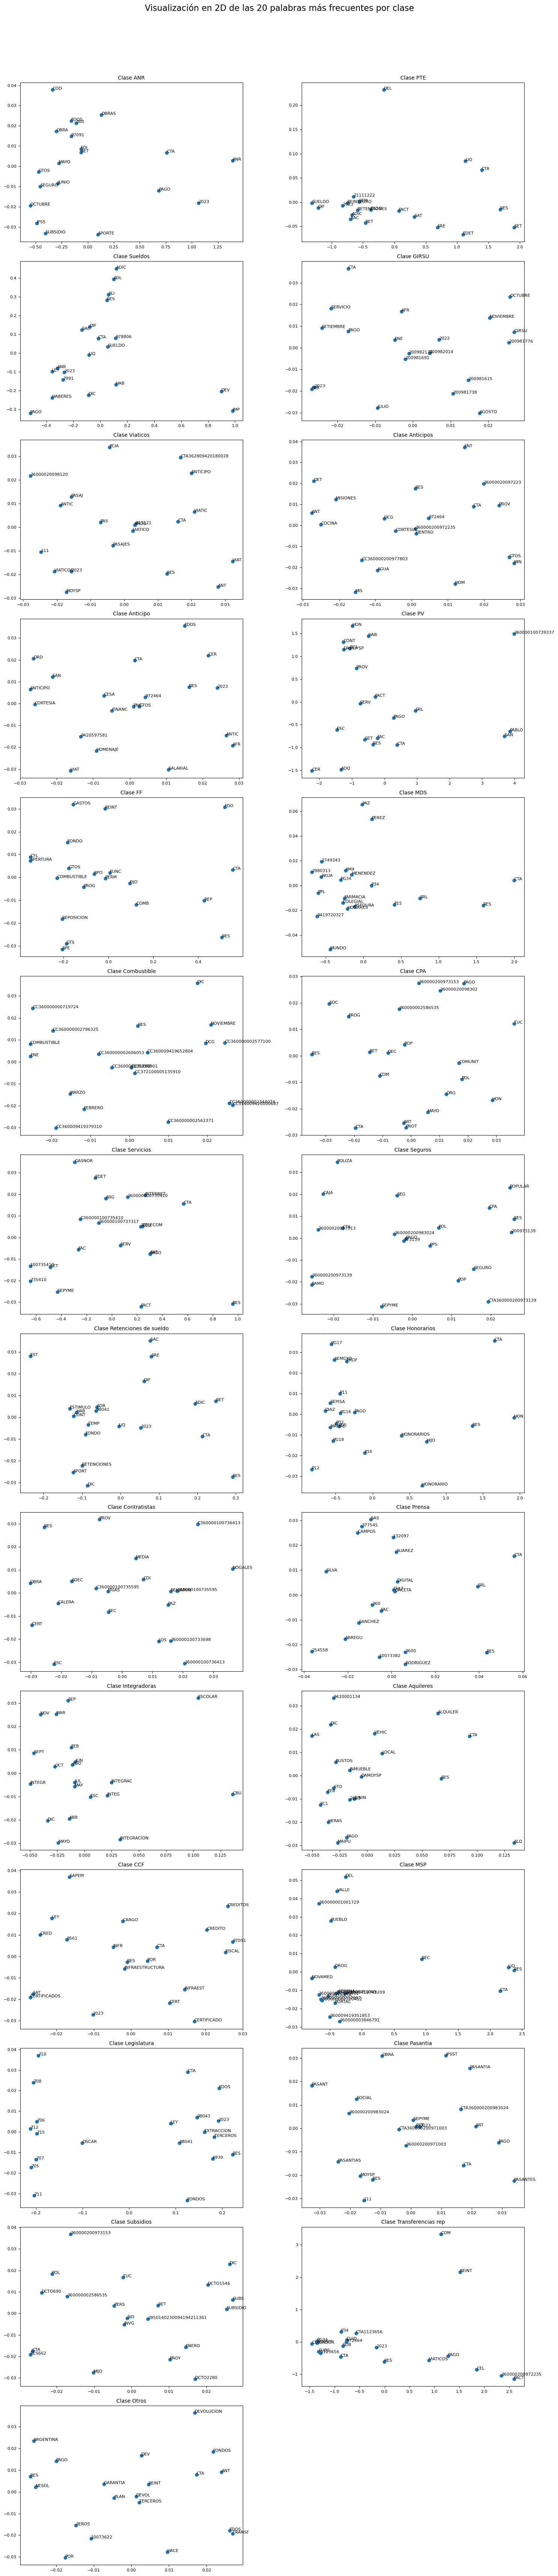

In [11]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

def plot_word2vec_pca(ax, df, class_value):
    # Filtrar el DataFrame para la clase específica
    df_class = df[df['Class'] == class_value]
    
    # Preparar las oraciones como listas de palabras
    sentences = [row.split() for row in df_class['Descripcion']]
    
    # Entrenar el modelo Word2Vec
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    # Obtener los vectores de las palabras
    words = list(model.wv.index_to_key)
    
    # Seleccionar las 20 palabras más frecuentes
    top_words = words[:20]
    X = model.wv[top_words]
    
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # Graficar
    ax.scatter(result[:, 0], result[:, 1])
    
    # Anotar solo las palabras seleccionadas en el gráfico
    for i, word in enumerate(top_words):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8)
    
    ax.set_title(f'Clase {class_value}', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Obtener todas las clases únicas
classes = df['Class'].unique()

# Calcular el número de filas necesarias
n_rows = math.ceil(len(classes) / 2)

# Crear la figura y los subplots
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
fig.suptitle('Visualización en 2D de las 20 palabras más frecuentes por clase', fontsize=16)

# Aplanar el array de ejes si solo hay una fila
if n_rows == 1:
    axs = axs.reshape(1, -1)

# Crear un gráfico para cada clase
for i, class_value in enumerate(classes):
    row = i // 2
    col = i % 2
    plot_word2vec_pca(axs[row, col], df, class_value)

# Ocultar subplots vacíos si el número de clases es impar
if len(classes) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Ajustar para el título principal
plt.show()

#### NER 

Named entity recognition (NER) es una técnica de NLP que identifica automáticamente entidades en un texto y las clasifica en alguna categoría predefinida.

<br>Una entidad puede ser:

- Nombres
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

<br>Utilizaremos spacy para extraer las entidades de las descripciones.

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
  return ents

In [17]:
df["NER"] = df["Descripcion"].apply(get_entities)

In [18]:
df[['Descripcion', 'NER']].sample(20)

Descripcion  \
36354  RES489CTA36000020097229 7PAGO HABERES MES MARZ...   
747                 APERTURA FDO RES CTA 360000003301902   
17129  RES 294 SEPYME MARCO FACT 096 CTA 360009419389250   
22684                 RES 212 CTA 9420239478 HON CARRIZO   
39061                  RES5258 CTA1123656 CUID ARMAS P34   
3443            CIENTIFICA DOMINGUEZ CTA 360000000857842   
14632                    RES1321 DCG GASNOR PERIODO 2023   
41371       ADL BONO 2370 JUL RES 281 CTA 36000000298648   
13128  RES587CTA315909420779495INSTALAC SERV PTP FIBR...   
10729          CPRA INSUMOS INFOR VIATICO 161 CTA 369514   
27536          RES 652 MDP KRASKA HON CTA 36000942041642   
13111    RES FAC 1290 YOUNES MARCELO CTA 360000100738532   
1207        RES 207 CTA 36000020098108 RPO FDO COMB PROG   
32305               1118 460209557508395 2376 RIVERO MON   
14516                          RES 214 CTA 410122 YANDAL   
44428    RES 937 HABERES MES LEY 7007 CTA 36000020098119   
16604                 RET SUB SALUD FAMILIAR MAYO 971010   
27896          MICUCCIO LIQ 1403 CTA 2101442309 RES 4216   
14909           RES703 COM GTOS BANC PAH 360000200973153   
45927     RES 245 STSV ADIC 634 DIC LIQ2 362809420179891   

                                                     NER  
36354                                    [7PAGO, 23SEOP]  
747                                                   []  
17129                     [RES, 096 CTA 360009419389250]  
22684                                              [RES]  
39061                                     [RES5258, P34]  
3443                                                  []  
14632                          [RES1321, GASNOR PERIODO]  
41371                             [ADL, BONO, 2370, JUL]  
13128  [RES587CTA315909420779495INSTALAC SERV PTP FIB...  
10729                                              [161]  
27536                                              [RES]  
13111  [RES FAC 1290, YOUNES MARCELO CTA 360000100738...  
1207                                          [RES, 207]  
32305                [1118 460209557508395 2376, RIVERO]  
14516                                         [RES, 214]  
44428                 [RES, LEY 7007 CTA 36000020098119]  
16604              [RET SUB SALUD FAMILIAR MAYO, 971010]  
27896                [LIQ, 1403 CTA 2101442309 RES 4216]  
14909                                  [360000200973153]  
45927                   [RES, 634, DIC, 362809420179891]

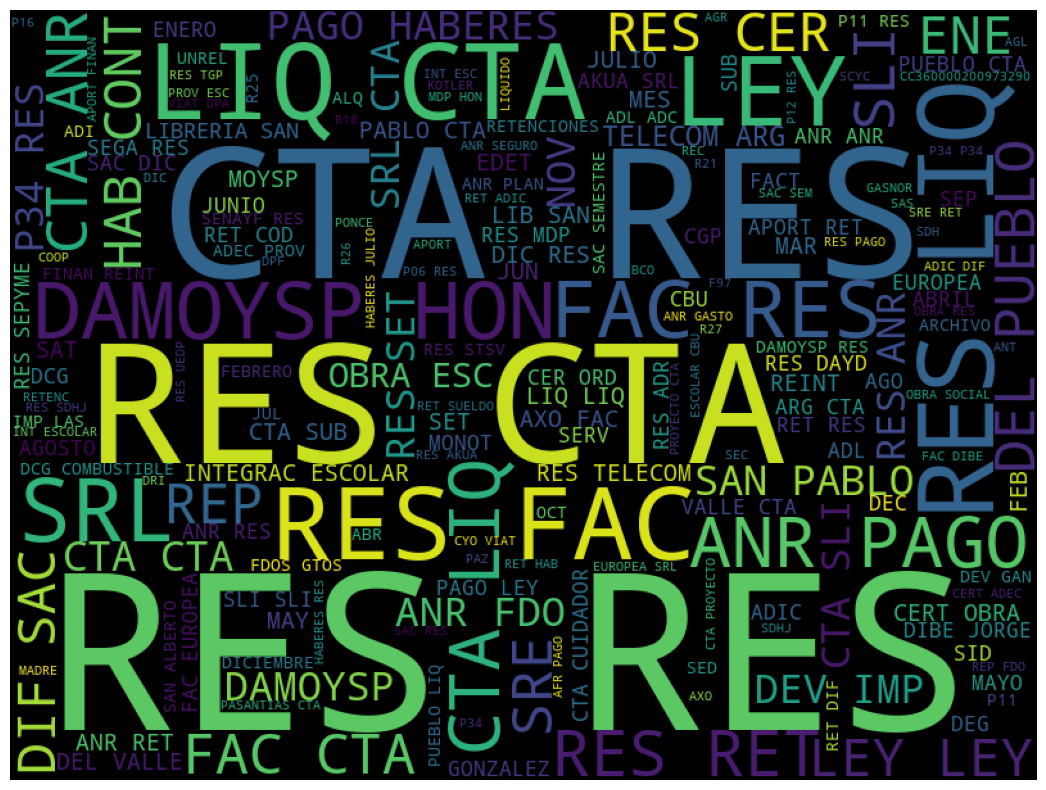

In [22]:
# Asegurarse de que todos los valores de la columna 'NER' sean tratados como cadenas
df_exploded = df.explode("NER")
df_exploded['NER_explotado'] = df_exploded['NER'].apply(lambda x: str(x or ""))

# Filtrar y contar las ocurrencias no numéricas en la columna 'NER'
df_ner_exploded = (
    df_exploded[df_exploded.NER_explotado.apply(lambda x: not x.isnumeric())]
    .groupby("NER_explotado")
    .size()
    .reset_index(name='cantidad')
    .sort_values(by="cantidad", ascending=False)
    .head(20)
)

# Filtrar los valores que no sean 'nan'
df_exploded = df_exploded[df_exploded['NER_explotado'] != 'nan']

# Generar la nube de palabras (cloud) usando la columna correcta
cloud(' '.join(df_exploded['NER_explotado']))


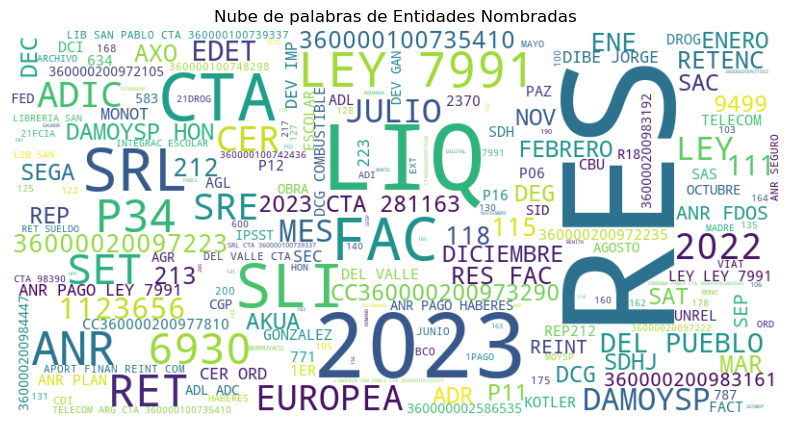

Las 20 entidades más comunes:
RES: 10499
LIQ: 1695
2023: 1646
CTA: 740
SLI: 629
SRL: 614
FAC: 597
LEY 7991: 398
ANR: 369
P34: 344
RET: 326
6930: 315
SET: 296
2022: 218
SRE: 217
CER: 202
ADIC: 200
EUROPEA: 184
JULIO: 167
LEY: 162


In [24]:
import spacy
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# Asumiendo que tu DataFrame se llama 'df' y tiene una columna 'Descripcion'
# Si no es así, ajusta el nombre del DataFrame y la columna según sea necesario

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Aplicar la función a la columna 'Descripcion'
df['entities'] = df['Descripcion'].apply(extract_entities)

# Aplanar la lista de entidades
all_entities = [entity for entities in df['entities'] for entity in entities]

# Contar las entidades
entity_counts = Counter(all_entities)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de Entidades Nombradas')
plt.show()


# plt.savefig('ner_wordcloud.png', bbox_inches='tight')

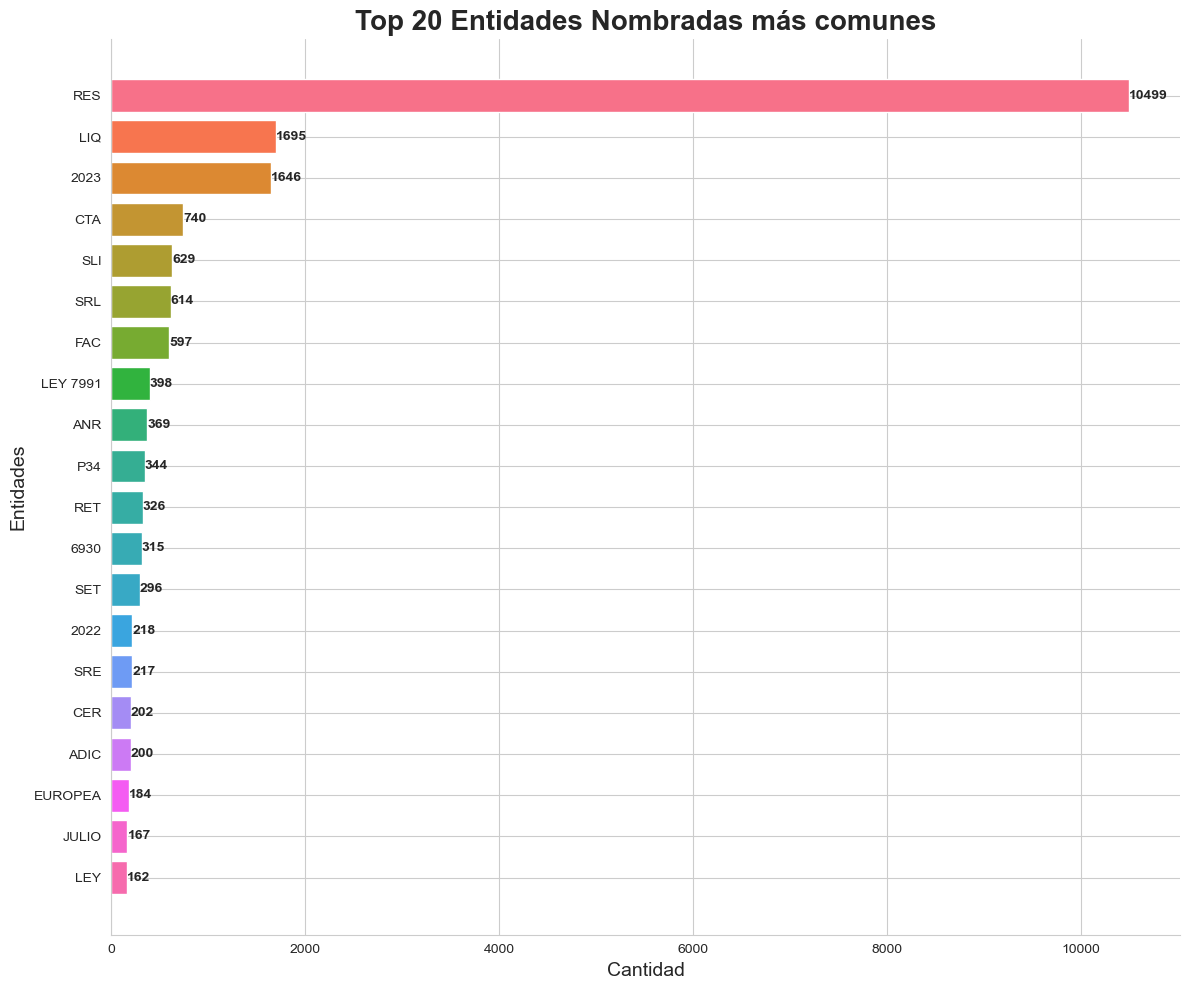

In [31]:
# Obtener las 20 entidades más comunes y ordenarlas de mayor a menor
top_20 = sorted(entity_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar las entidades y los conteos
entities, counts = zip(*top_20)

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(entities)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(entities)), entities)

# Personalizar el gráfico
plt.title('Top 20 Entidades Nombradas más comunes', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Entidades', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que la entidad más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### Noun chunks

Spacy también nos permite extraer "noun chunks" de un texto. Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

Creamos una función que dado un texto retorne un listado de noun chunks. Luego aplicamos la función al dataframe y almacenamos resultados en la columna "NOUN_CHUNKS"

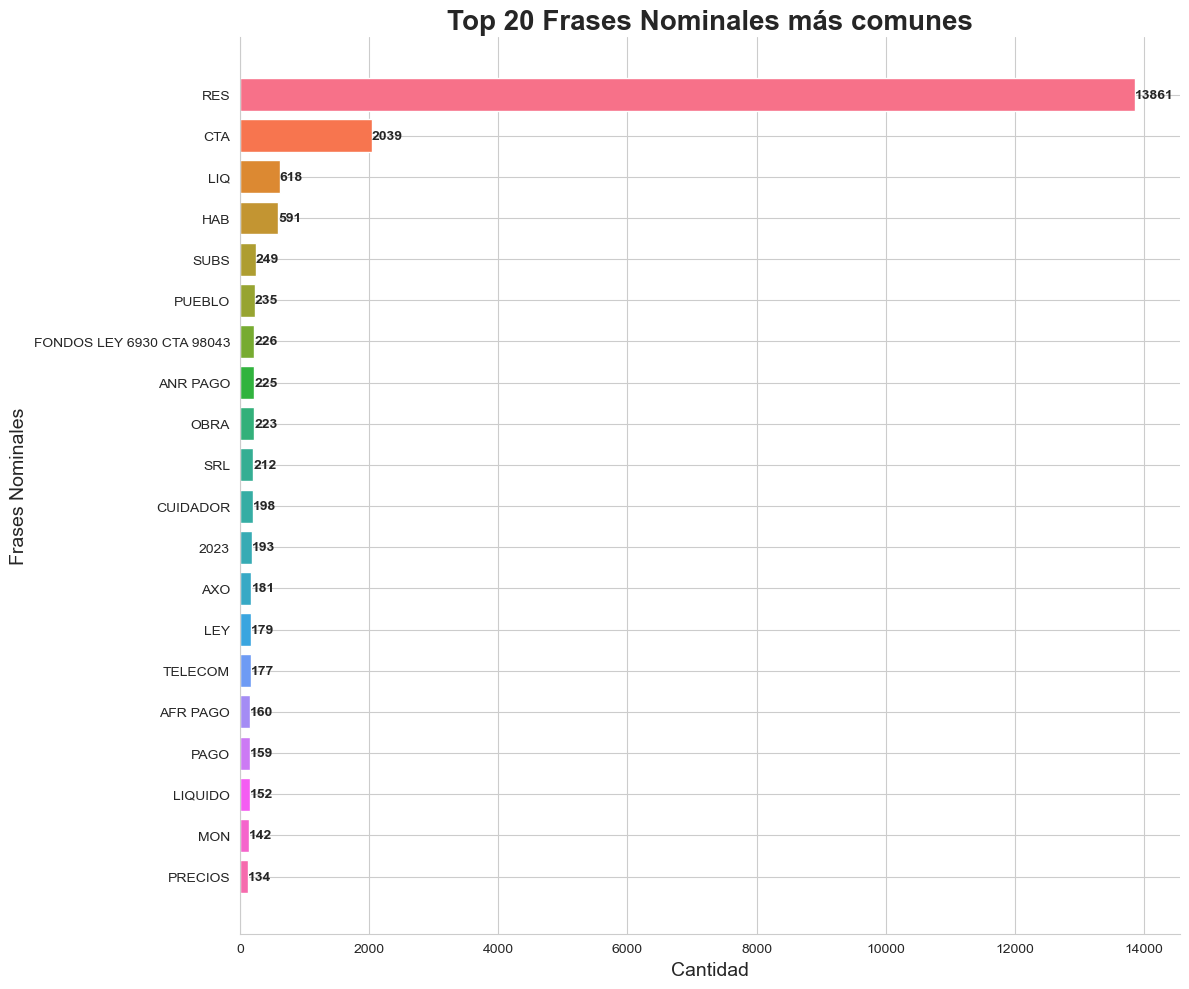

Los 20 noun chunks más comunes:
RES: 13861
CTA: 2039
LIQ: 618
HAB: 591
SUBS: 249
PUEBLO: 235
FONDOS LEY 6930 CTA 98043: 226
ANR PAGO: 225
OBRA: 223
SRL: 212
CUIDADOR: 198
2023: 193
AXO: 181
LEY: 179
TELECOM: 177
AFR PAGO: 160
PAGO: 159
LIQUIDO: 152
MON: 142
PRECIOS: 134


In [35]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Asumiendo que tu DataFrame se llama 'df' y tiene una columna 'Descripcion'

def extract_noun_chunks(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

# Aplicar la función a la columna 'Descripcion'
df['noun_chunks'] = df['Descripcion'].apply(extract_noun_chunks)

# Aplanar la lista de noun chunks
all_chunks = [chunk for chunks in df['noun_chunks'] for chunk in chunks]

# Contar los noun chunks
chunk_counts = Counter(all_chunks)

# Obtener los 20 noun chunks más comunes y ordenarlos de mayor a menor
top_20 = sorted(chunk_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar los chunks y los conteos
chunks, counts = zip(*top_20)

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(chunks)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(chunks)), chunks)

# Personalizar el gráfico
plt.title('Top 20 Frases Nominales más comunes', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frases Nominales', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que el chunk más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Si quieres guardar la imagen
# plt.savefig('top_20_noun_chunks.png', bbox_inches='tight', dpi=300)

# Imprimir los 20 noun chunks más comunes
print("Los 20 noun chunks más comunes:")
for chunk, count in top_20:
    print(f"{chunk}: {count}")

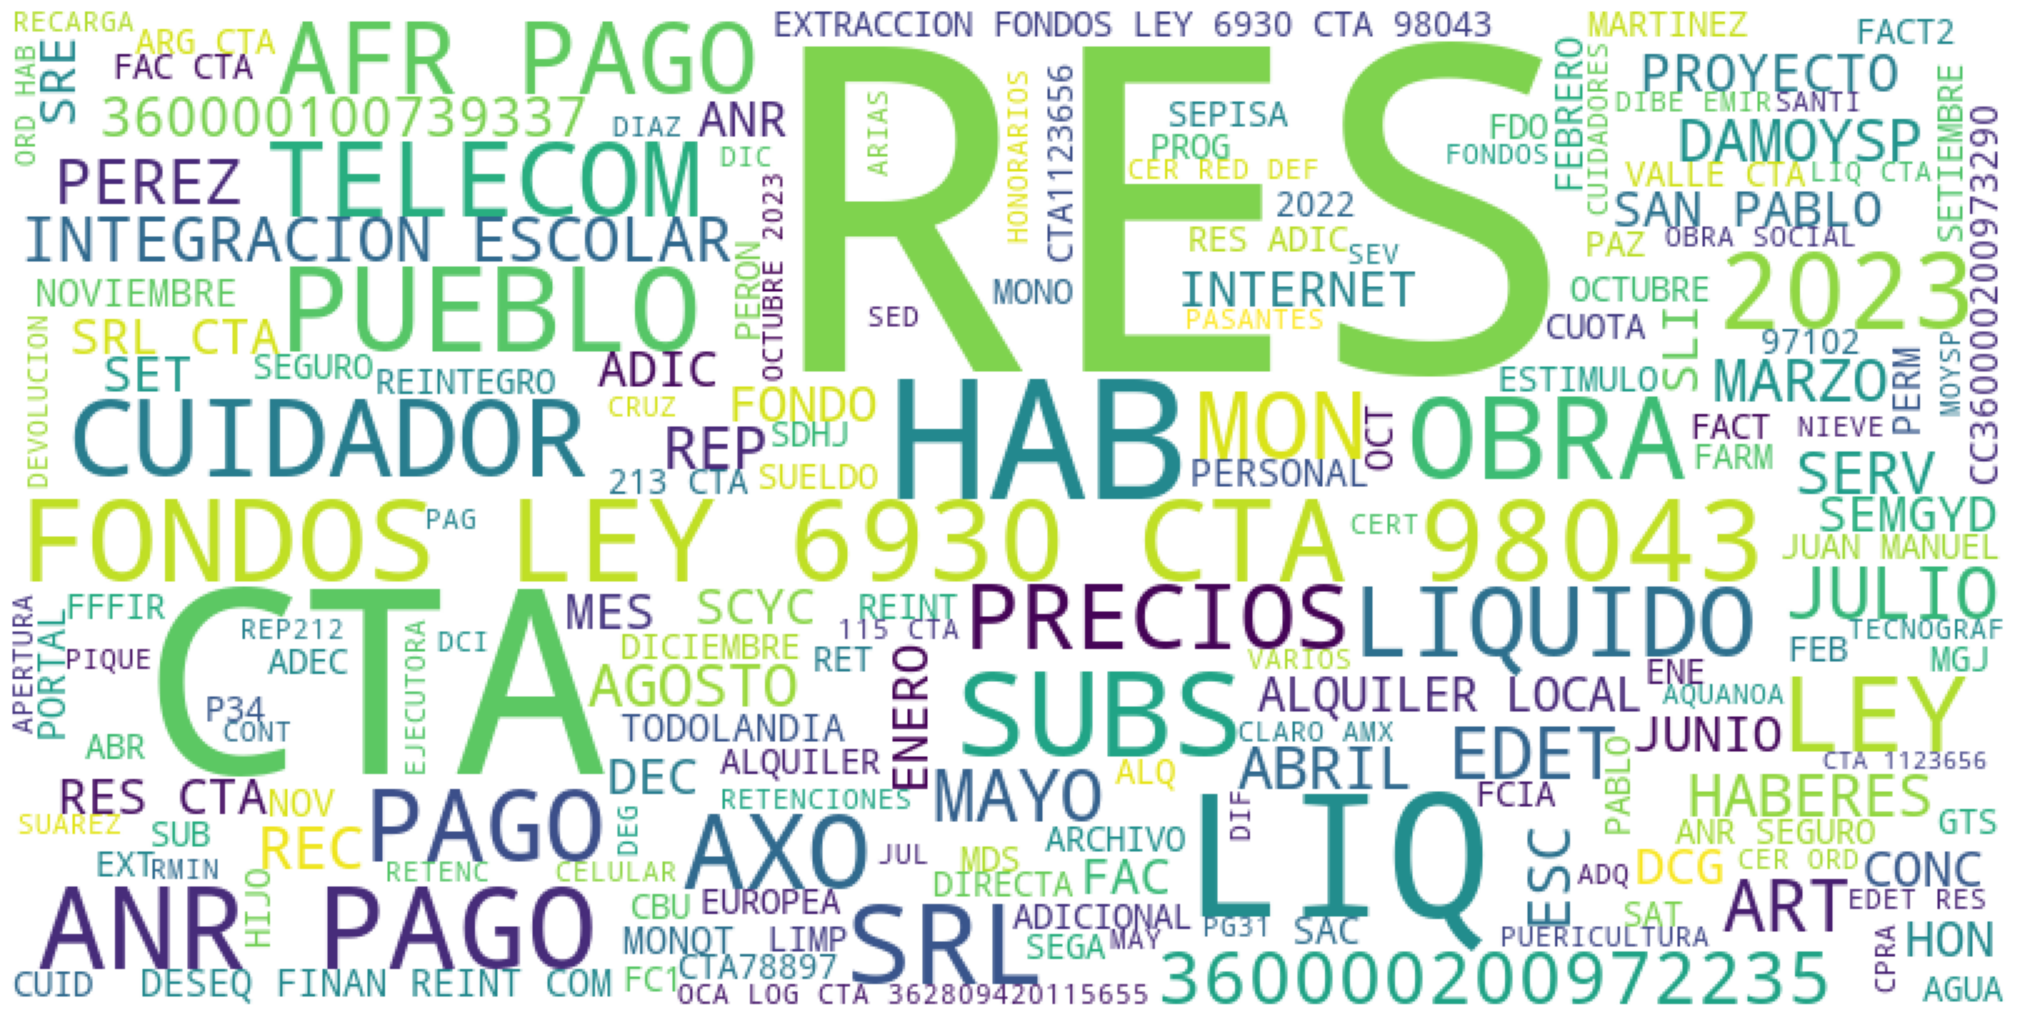

In [38]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      min_font_size=10).generate_from_frequencies(chunk_counts)

# Crear la figura
plt.figure(figsize=(20,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Mostrar la nube de palabras
plt.show()

#### KeyBert

KeyBERT es una técnica de extracción de palabras clave que utiliza modelos de lenguaje BERT (Bidirectional Encoder Representations from Transformers).

In [39]:
### CUIDADO: tarda 1 hora ###

from keybert import KeyBERT

# Inicializa el modelo KeyBERT
kw_model = KeyBERT()

# Extrae las keywords para cada descripción
df['keywords'] = df['Descripcion'].apply(lambda x: kw_model.extract_keywords(x, top_n=5))


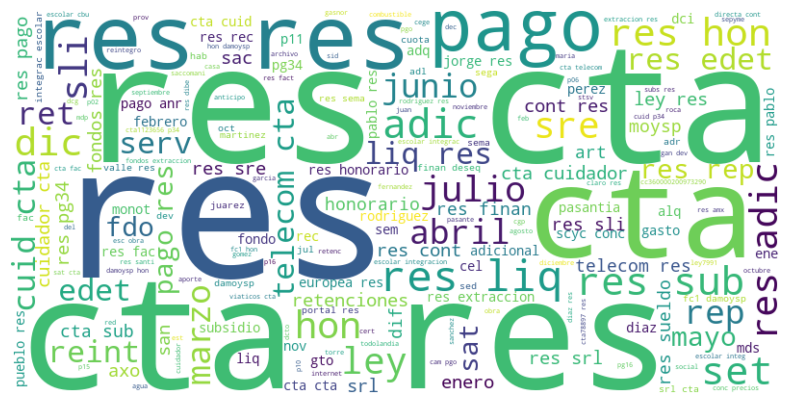

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todas las keywords en un solo string
all_keywords = ' '.join([' '.join([kw[0] for kw in kws]) for kws in df['keywords']])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_keywords)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Figure size 1000x500 with 0 Axes>

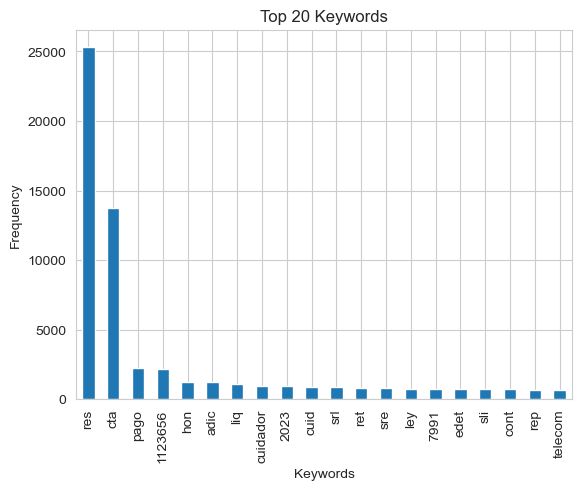

In [41]:
from collections import Counter

# Contar la frecuencia de cada keyword
keyword_counts = Counter([kw[0] for kws in df['keywords'] for kw in kws])

# Convertir a DataFrame para graficar
df_keyword_counts = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)

# Graficar
plt.figure(figsize=(10, 5))
df_keyword_counts.head(20).plot(kind='bar', x='Keyword', y='Count', legend=False)
plt.title('Top 20 Keywords')
plt.ylabel('Frequency')
plt.xlabel('Keywords')
plt.show()


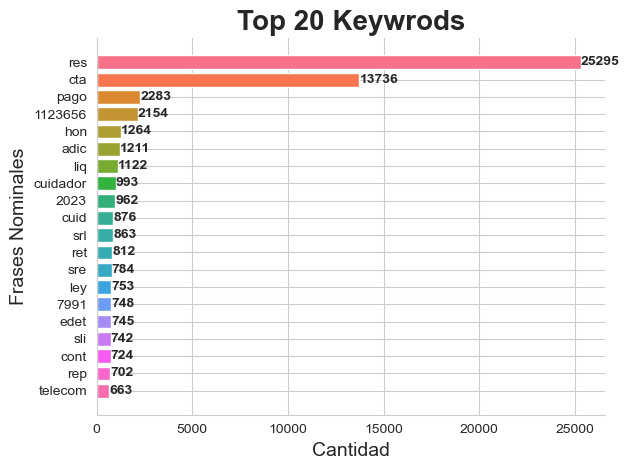

In [42]:
from collections import Counter

# Contar la frecuencia de cada keyword
keyword_counts = Counter([kw[0] for kws in df['keywords'] for kw in kws])

# Obtener los 20 noun chunks más comunes y ordenarlos de mayor a menor
top_20 = sorted(keyword_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar los chunks y los conteos
kewywords, counts = zip(*top_20)

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(kewywords)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(kewywords)), kewywords)

# Personalizar el gráfico
plt.title('Top 20 Keywords', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frases Nominales', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que el chunk más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Si quieres guardar la imagen
# plt.savefig('top_20_noun_chunks.png', bbox_inches='tight', dpi=300)

#### BerTopic

BERTopic es una técnica avanzada de modelado de tópicos que combina las capacidades de los modelos de lenguaje BERT con algoritmos de agrupamiento y reducción de dimensionalidad. 

En BERTopic, un tópico (o tema) es un conjunto de palabras que representan un concepto o un tema específico en un corpus de texto. 

Propósito:

- BERTopic se utiliza para descubrir y analizar temas (tópicos) en grandes colecciones de documentos de texto.

Ahora utilizaremos BERTopic para extraer tópicos.

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["Descripcion"].values)

In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

El topico -1 corresponde a outliers.

In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)

In [ ]:
df = df.rename(columns={"Name_y": "TOPIC_NAME"})

En muestra este gráfico podemos ver la relación entre los tópicos identificados.

In [ ]:
topic_model.visualize_topics()